In [15]:
# 0. 사용할 패키지 불러오기
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt

In [16]:
# 0 numpy.ndarray image view
def MNIST_show(pixels, label):
    pixels = np.array(pixels, dtype='float64')
    pixels = pixels.reshape((28,28))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [17]:
# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train
x = (60000, 28, 28) y = (60000,)


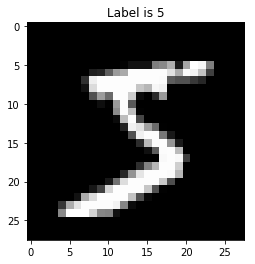

test
x = (10000, 28, 28) y = (10000,)


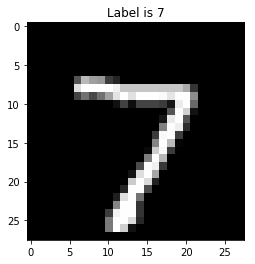

In [18]:
print('train')
print('x =', x_train.shape, 'y =', y_train.shape)
MNIST_show(x_train[0], y_train[0])
print('test')
print('x =', x_test.shape, 'y =', y_test.shape)
MNIST_show(x_test[0], y_test[0])

In [19]:
print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [20]:
# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

train
x = (60000, 784) y = (60000,)


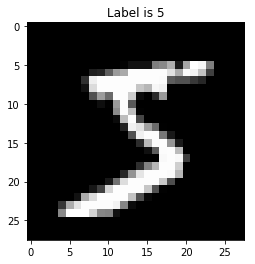

test
x = (10000, 784) y = (10000,)


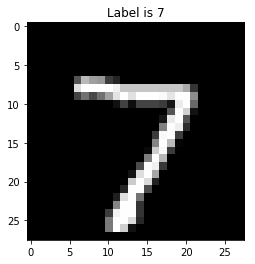

In [21]:
print('train')
print('x =', x_train.shape, 'y =', y_train.shape)
MNIST_show(x_train[0], y_train[0])
print('test')
print('x =', x_test.shape, 'y =', y_test.shape)
MNIST_show(x_test[0], y_test[0])

In [22]:
print(x_train[0])
print(y_train[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [23]:
# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [24]:
print(y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [25]:
# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

In [26]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [27]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [28]:
# 4. 모델 학습시키기
tb_hist = keras.callbacks.TensorBoard(log_dir='./log', histogram_freq=0, write_graph=True, write_images=True)
hist = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val), callbacks=[tb_hist])

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 2s 135us/step - loss: 1.1377 - acc: 0.7227 - val_loss: 0.6495 - val_acc: 0.8405
Epoch 2/5
18000/18000 [==============================] - 2s 135us/step - loss: 0.5200 - acc: 0.8644 - val_loss: 0.4820 - val_acc: 0.8694
Epoch 3/5
18000/18000 [==============================] - 2s 120us/step - loss: 0.4183 - acc: 0.8839 - val_loss: 0.4183 - val_acc: 0.8840
Epoch 4/5
18000/18000 [==============================] - 2s 111us/step - loss: 0.3722 - acc: 0.8947 - val_loss: 0.3825 - val_acc: 0.8918
Epoch 5/5
18000/18000 [==============================] - 2s 111us/step - loss: 0.3434 - acc: 0.9018 - val_loss: 0.3605 - val_acc: 0.8974


In [29]:
# bash
# tensorboard --logdir=/notebooks/02_DL_Concept/06/log

In [30]:
# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 0s 30us/step

loss_and_metrics : [0.33253751949667931, 0.90839999999999999]


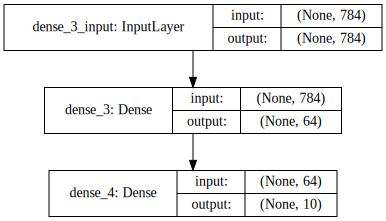

In [31]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

# 6 모델 아키텍처 보기
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [32]:
from keras.models import load_model
# 7-1 모델과 가중치를 저장하기
model.save('mnist_mlp_model.h5')

In [33]:
from keras.models import model_from_json

# 7-2 모델만 JSON 으로 저장하기

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# 7-3 가중치만 저장하기
model.save_weights("weights.h5")

In [34]:
from keras.models import load_model

# 8-1 모델과 가중치를 불러오기
model2 = load_model('mnist_mlp_model.h5')

In [35]:
# 8-2 모델만 JSON 으로 불러오기
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
model2 = model_from_json(loaded_model_json)

# 8-3 가중치만 불러오기
model2.load_weights("weights.h5")

In [36]:
# JSON, YAML is possible to format of Model save and load 

xhat_idx = [4215 4587 7852 5794   67]
xhat shape = (5, 784)
yhat = [7 6 7 1 4]


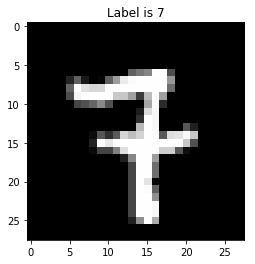

True : 7, Predict : 7


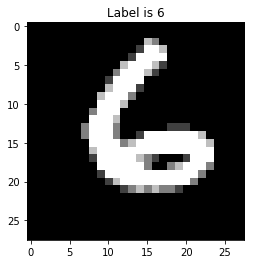

True : 6, Predict : 6


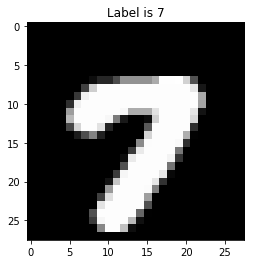

True : 7, Predict : 7


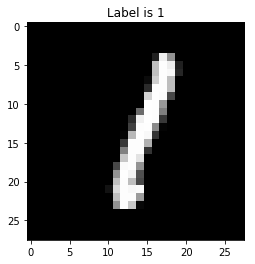

True : 1, Predict : 1


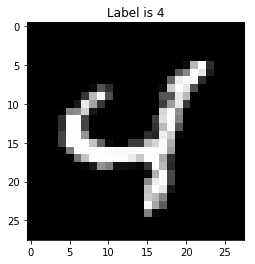

True : 4, Predict : 4


In [37]:
# 9 모델 테스트/사용하기

xhat_idx = np.random.choice(x_test.shape[0], 5)
print('xhat_idx =', xhat_idx)

xhat = x_test[xhat_idx]
print('xhat shape =', xhat.shape)

yhat = model.predict_classes(xhat)
print('yhat =', yhat)

for i in range(5):
    MNIST_show(xhat[i], yhat[i])
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))